## Scatter plot

0it [00:00, ?it/s]

INFO:root:pandarallel.initialize(nb_workers=4,progress_bar=True)


INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


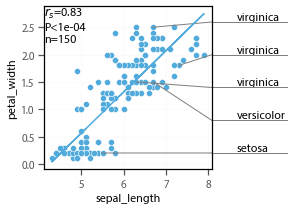

In [1]:
# demo data
import seaborn as sns
df1=sns.load_dataset('iris')
# plot
from roux.viz.scatter import plot_scatter
ax=plot_scatter(df1,colx='sepal_length',coly='petal_width')
from roux.viz.annot import annot_side
ax=annot_side(ax=ax,
           df1=df1.sample(5),
           colx='sepal_length',coly='petal_width',cols='species',length_axhline=1.3)

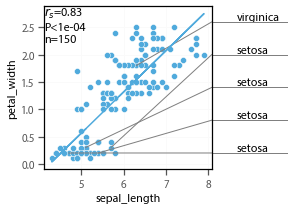

In [2]:
# demo data
import seaborn as sns
df1=sns.load_dataset('iris')
# plot
from roux.viz.scatter import plot_scatter
ax=plot_scatter(df1,colx='sepal_length',coly='petal_width')
from roux.viz.annot import annot_side
ax=annot_side(ax=ax,
           df1=df1.sample(5),
           colx='sepal_length',coly='petal_width',cols='species',length_axhline=1.3)

## Histogram

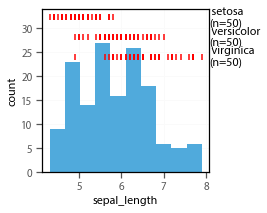

In [3]:
# demo data
import seaborn as sns
df1=sns.load_dataset('iris')

# plot
from roux.viz.dist import hist_annot
ax=hist_annot(df1,colx='sepal_length',colssubsets=['species'],bins=10,
          params_scatter=dict(marker='|',alpha=1))

## Heatmap

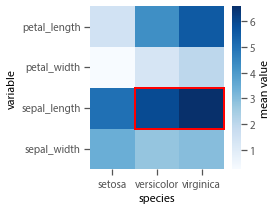

In [4]:
# demo data
import seaborn as sns
df1=sns.load_dataset('iris')
df1=(df1
    .set_index('species')
    .melt(ignore_index=False)
    .reset_index()
    .pivot_table(index='variable',columns='species',values='value',aggfunc='mean'))

# plot
ax=sns.heatmap(df1,
            cmap='Blues',
           cbar_kws=dict(label='mean value'))
from roux.viz.annot import show_box
ax=show_box(ax=ax,xy=[1,2],width=2,height=1,ec='red',lw=2)

## Distributions

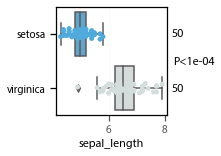

In [5]:
# demo data
import seaborn as sns
df1=sns.load_dataset('iris')
df1=df1.loc[df1['species'].isin(['setosa','virginica']),:]
df1['id']=range(len(df1))

# plot
from roux.viz.dist import plot_dists
ax=plot_dists(df1,x='sepal_length',y='species',colindex='id',kind=['box','strip'])

## Barplot

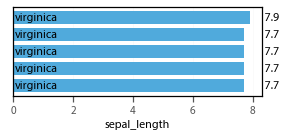

In [6]:
# demo data
import seaborn as sns
df1=sns.load_dataset('iris')

# plot
from roux.viz.bar import plot_barh
ax=plot_barh(df1.sort_values('sepal_length',ascending=False).head(5),
          colx='sepal_length',coly='species',colannnotside='sepal_length')

## Saving plots with the source data

In [7]:
# demo data
import seaborn as sns
df1=sns.load_dataset('iris')

Activating auto-logging. Current session state plus future input saved.
Filename       : log_notebook.log
Mode           : over
Output logging : False
Raw input log  : False
Timestamping   : False
State          : active


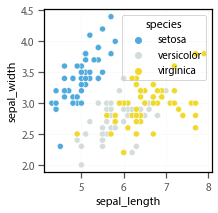

In [8]:
# import helper functions
from roux.global_imports import *

## parameters
kws_plot=dict(y='sepal_width')
## log the code from this cell of the notebook
log_code()
# plot
fig,ax=plt.subplots(figsize=[3,3])
sns.scatterplot(data=df1,x='sepal_length',y=kws_plot['y'],hue='species',
                ax=ax,)
## save the plot
to_plot('plot.png',# filename
       df1=df1, #source data
       kws_plot=kws_plot,# plotting parameters
       )
assert exists('plot.png')

## "Reading" the plots

INFO:root:shape = (150, 5)


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

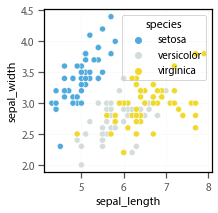

In [9]:
read_plot('plot.png')

INFO:root:shape = (150, 5)


<AxesSubplot:title={'center':'modified'}, xlabel='sepal_length', ylabel='petal_length'>

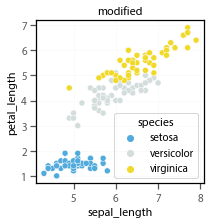

In [10]:
## modifying the plotting parameters
read_plot('plot.png',kws_plot=dict(y='petal_length'),title='modified')